In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# bicyclist data collected from North Carolina
bicycle = pd.read_csv('data/NCDOT_BikePedCrash.csv')

In [3]:
all_columns = bicycle.columns

all_columns

Index(['X', 'Y', 'OBJECTID', 'AmbulanceR', 'BikeAge', 'BikeAgeGrp',
       'BikeAlcDrg', 'BikeAlcFlg', 'BikeDir', 'BikeInjury', 'BikePos',
       'BikeRace', 'BikeSex', 'City', 'County', 'CrashAlcoh', 'CrashDay',
       'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth', 'CrashSevr',
       'CrashType', 'CrashYear', 'Developmen', 'DrvrAge', 'DrvrAgeGrp',
       'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex',
       'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 'NumBicsAin', 'NumBicsBin', 'NumBicsCin', 'NumBicsKil',
       'NumBicsNoi', 'NumBicsTot', 'NumBicsUin', 'NumLanes', 'NumUnits',
       'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdDefects',
       'RdFeature', 'RdSurface', 'Region', 'RuralUrban', 'SpeedLimit',
       'TraffCntrl', 'Weather', 'Workzone'],
      dtype='object')

In [4]:
## Keep the following columns, and drop the rest

keep_columns = ['BikeAgeGrp', 'BikeDir', 'BikeInjury', 'BikePos', 'BikeRace',
                'BikeSex', 'CrashHour', 'CrashMonth', 'CrashLoc', 'DrvrVehTyp',
                'LightCond', 'Locality', 'NumLanes', 'RdCharacte', 'RdClass',
                'RdConditio', 'RdConfig', 'RdFeature', 'RdSurface', 'Region',
                'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone']

drop_columns_set = set(all_columns) - set(keep_columns)

drop_columns = sorted(drop_columns_set)

In [5]:
# Our new dataframe with only the relevant columns 
# 'inplace = True' changes the dataframe directly

bicycle.drop(columns = drop_columns, inplace = True)

In [6]:
bicycle.head()

,BikeAgeGrp,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,CrashHour,CrashLoc,CrashMonth,DrvrVehTyp,...,RdClass,RdConditio,RdConfig,RdFeature,RdSurface,Region,SpeedLimit,TraffCntrl,Weather,Workzone
0,11-15,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,Male,16,Non-Intersection,January,Passenger Car,...,Local Street,Dry,"Two-Way, Divided, Unprotected Median",No Special Feature,Smooth Asphalt,Piedmont,30 - 35 MPH,No Control Present,Clear,No
1,20-24,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Hispanic,Male,9,Intersection,January,Passenger Car,...,Local Street,Dry,"Two-Way, Divided, Unprotected Median",Four-Way Intersection,Smooth Asphalt,Piedmont,30 - 35 MPH,Stop And Go Signal,Clear,No
2,30-39,Unknown,B: Suspected Minor Injury,Non-Roadway,Black,Male,17,Non-Roadway,January,Passenger Car,...,Public Vehicular Area,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Piedmont,20 - 25 MPH,No Control Present,Cloudy,No
3,30-39,With Traffic,C: Possible Injury,Travel Lane,White,Male,17,Intersection,January,Sport Utility,...,Local Street,Dry,"Two-Way, Not Divided",Four-Way Intersection,Smooth Asphalt,Piedmont,30 - 35 MPH,No Control Present,Cloudy,No
4,40-49,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,Male,12,Non-Intersection,January,Van,...,Local Street,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Coastal,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No


In [7]:
# Corresponding rows to the 'Unkown Injuries' category in the BikeInjuries column

bicycle[bicycle.BikeInjury == 'Unknown Injury'].head()

,BikeAgeGrp,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,CrashHour,CrashLoc,CrashMonth,DrvrVehTyp,...,RdClass,RdConditio,RdConfig,RdFeature,RdSurface,Region,SpeedLimit,TraffCntrl,Weather,Workzone
33,6-10,With Traffic,Unknown Injury,Travel Lane,Black,Male,16,Intersection,January,Passenger Car,...,Local Street,Dry,"Two-Way, Not Divided",Four-Way Intersection,Smooth Asphalt,Coastal,30 - 35 MPH,Stop Sign,Clear,No
51,Unknown,Facing Traffic,Unknown Injury,Travel Lane,Unknown/Missing,Unknown,18,Non-Intersection,January,Passenger Car,...,Local Street,Dry,"Two-Way, Divided, Unprotected Median",No Special Feature,Smooth Asphalt,Piedmont,30 - 35 MPH,No Control Present,Clear,No
64,11-15,With Traffic,Unknown Injury,Sidewalk / Crosswalk / Driveway Crossing,Unknown/Missing,Male,7,Non-Intersection,February,Pickup,...,Public Vehicular Area,Dry,"Two-Way, Not Divided","Driveway, Public",Smooth Asphalt,Coastal,30 - 35 MPH,No Control Present,Clear,No
185,Unknown,Unknown,Unknown Injury,Travel Lane,Black,Male,15,Non-Intersection,May,Passenger Car,...,Local Street,Dry,"Two-Way, Not Divided",No Special Feature,Coarse Asphalt,Piedmont,20 - 25 MPH,No Control Present,Clear,No
189,11-15,Unknown,Unknown Injury,Unknown,Unknown/Missing,Unknown,18,Non-Intersection,April,Passenger Car,...,Local Street,Dry,"Two-Way, Not Divided",No Special Feature,Smooth Asphalt,Coastal,30 - 35 MPH,No Control Present,Clear,No


In [8]:
# Drop all the 'Unkown Injuries' rows from dataframe

bicycle.drop(bicycle[bicycle.BikeInjury == 'Unknown Injury'].index, inplace=True)

In [9]:
## prints out all columns along with the frequency of each of their observations

for col in bicycle.columns:
    print(bicycle[col].value_counts())
    print()

BikeAgeGrp
50-59      1572
40-49      1555
20-24      1369
30-39      1306
11-15      1298
16-19      1140
25-29       939
6-10        720
60-69       690
70+         184
0-5         109
Unknown      45
Name: count, dtype: int64

BikeDir
With Traffic      6593
Facing Traffic    2638
Not Applicable    1281
Unknown            415
Name: count, dtype: int64

BikeInjury
B: Suspected Minor Injury      4660
C: Possible Injury             4338
O: No Injury                   1102
A: Suspected Serious Injury     577
K: Killed                       250
Name: count, dtype: int64

BikePos
Travel Lane                                 6820
Sidewalk / Crosswalk / Driveway Crossing    1942
Bike Lane / Paved Shoulder                   652
Non-Roadway                                  598
Unknown                                      477
Driveway / Alley                             273
Other                                         86
Multi-use Path                                79
Name: count, dtype: int64

In [10]:
# First convert entries of column into category type
cat_light_condition = pd.Categorical(bicycle['LightCond'])

# Then apply cat.codes to assign numeric values
bicycle['LightCond_Encoded'] = pd.Series(cat_light_condition).cat.codes

In [11]:
bicycle['LightCond_Encoded'].value_counts()

LightCond_Encoded
4.0    7829
0.0    1253
1.0     963
5.0     359
3.0     131
2.0      37
7.0      15
6.0       8
Name: count, dtype: int64

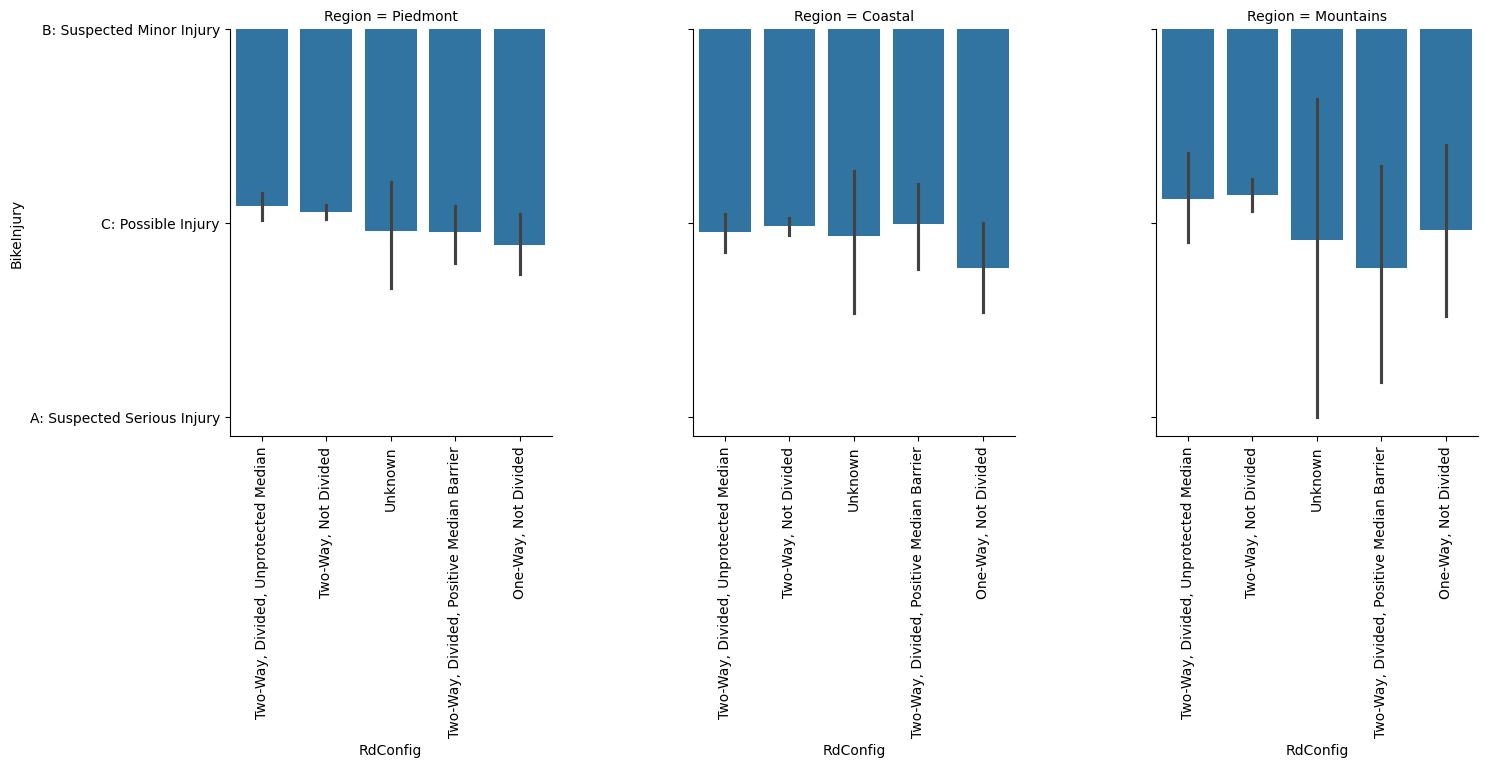

In [12]:
## Plotting bar graph of 3 categorical values

g = sns.catplot(data=bicycle, y='BikeInjury', x='RdConfig', col='Region', kind='bar')

g.set_xticklabels(rotation=90)


In [13]:
# Value encode the BikeInjury column
from pandas.api.types import CategoricalDtype

# Specify the order the categories / injury types
injuries = ['O: No Injury', 'C: Possible Injury', 'B: Suspected Minor Injury', 'A: Suspected Serious Injury', 'K: Killed']

# Creates the ordering 
cat_type = CategoricalDtype(categories=injuries, ordered=True)

# cat.codes assigns numeric values based on increasing order
# Store in new column
bicycle['BikeInjury_Encoded'] = bicycle['BikeInjury'].astype(cat_type).cat.codes

bicycle.head(2)

,BikeAgeGrp,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,CrashHour,CrashLoc,CrashMonth,DrvrVehTyp,...,RdConfig,RdFeature,RdSurface,Region,SpeedLimit,TraffCntrl,Weather,Workzone,LightCond_Encoded,BikeInjury_Encoded
0,11-15,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,Male,16,Non-Intersection,January,Passenger Car,...,"Two-Way, Divided, Unprotected Median",No Special Feature,Smooth Asphalt,Piedmont,30 - 35 MPH,No Control Present,Clear,No,4.0,2
1,20-24,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Hispanic,Male,9,Intersection,January,Passenger Car,...,"Two-Way, Divided, Unprotected Median",Four-Way Intersection,Smooth Asphalt,Piedmont,30 - 35 MPH,Stop And Go Signal,Clear,No,4.0,1


In [14]:
## Simplify Weather column into 2 categories: Clear and Not Clear

## First, change dtype to string
bicycle['Weather'] = bicycle['Weather'].astype('string')

unclear_indicies = bicycle['Weather'].loc[bicycle['Weather'] != 'Clear'].index

bicycle.loc[unclear_indicies, 'Weather'] = 'Not Clear'

In [15]:
# One-Hot encode the weather column (Clear=1, Not_Clear=0)

bicycle['Weather_Encoded'] = pd.get_dummies(bicycle['Weather'], dtype=int)['Clear']

In [16]:
## Simplify 'DrvrVehTyp' column into 2 categories: 

bicycle['DrvrVehTyp'] = bicycle['DrvrVehTyp'].astype('string')

unclear_indicies = bicycle['DrvrVehTyp'].loc[bicycle['DrvrVehTyp'] != 'Passenger Car'].index

bicycle.loc[unclear_indicies, 'DrvrVehTyp'] = 'None Passenger Car'

In [17]:
## Simplify 'RdConditio' column into 2 

bicycle['RdConditio'] = bicycle['RdConditio'].astype('string')

unclear_indicies = bicycle['RdConditio'].loc[bicycle['RdConditio'] != 'Dry'].index

bicycle.loc[unclear_indicies, 'RdConditio'] = 'Not Dry'

In [18]:
## Simplify 'RdSurface' column into 2 

bicycle['RdSurface'] = bicycle['RdSurface'].astype('string')

unclear_indicies = bicycle['RdSurface'].loc[bicycle['RdSurface'] != 'Smooth Asphalt'].index

bicycle.loc[unclear_indicies, 'RdSurface'] = 'Not Smooth Asphalt'

In [19]:
## Simplify 'RdClass' column into 2 

bicycle['RdClass'] = bicycle['RdClass'].astype('string')

unclear_indicies = bicycle['RdClass'].loc[bicycle['RdClass'] != 'Local Street'].index

bicycle.loc[unclear_indicies, 'RdClass'] = 'Not Local Street'

In [20]:
## Simplify 'RdCharacte' column into 2 

bicycle['RdCharacte'] = bicycle['RdCharacte'].astype('string')

unclear_indicies = bicycle['RdCharacte'].loc[bicycle['RdCharacte'] != 'Straight - Level'].index

bicycle.loc[unclear_indicies, 'RdCharacte'] = 'Not Straight - Level'

In [21]:
## Simplify 'RdFeature' column into 2 

bicycle['RdFeature'] = bicycle['RdFeature'].astype('string')

unclear_indicies = bicycle['RdFeature'].loc[bicycle['RdFeature'] != 'No Special Feature'].index

bicycle.loc[unclear_indicies, 'RdFeature'] = 'Special Feature'

In [22]:
## Simplify 'NumLanes' column into 2 

bicycle['NumLanes'] = bicycle['NumLanes'].astype('string')

unclear_indicies = bicycle['NumLanes'].loc[bicycle['NumLanes'] != '2 lanes'].index

bicycle.loc[unclear_indicies, 'NumLanes'] = 'No 2 lanes'

In [23]:
# No injuries category used as the baseline model

no_injury_features = bicycle.loc[bicycle['BikeInjury'] == 'O: No Injury']

for col in bicycle.columns:
    print(no_injury_features[col].value_counts())
    print()

BikeAgeGrp
20-24      156
30-39      145
40-49      140
11-15      132
16-19      127
25-29      113
50-59      111
6-10        82
60-69       65
70+         12
0-5         11
Unknown      8
Name: count, dtype: int64

BikeDir
With Traffic      584
Facing Traffic    297
Not Applicable    181
Unknown            40
Name: count, dtype: int64

BikeInjury
O: No Injury    1102
Name: count, dtype: int64

BikePos
Travel Lane                                 587
Sidewalk / Crosswalk / Driveway Crossing    251
Non-Roadway                                  94
Unknown                                      61
Bike Lane / Paved Shoulder                   60
Driveway / Alley                             33
Multi-use Path                                8
Other                                         8
Name: count, dtype: int64

BikeRace
White              607
Black              386
Hispanic            58
Unknown/Missing     19
Other               16
Native American      9
Asian                7
Name: count

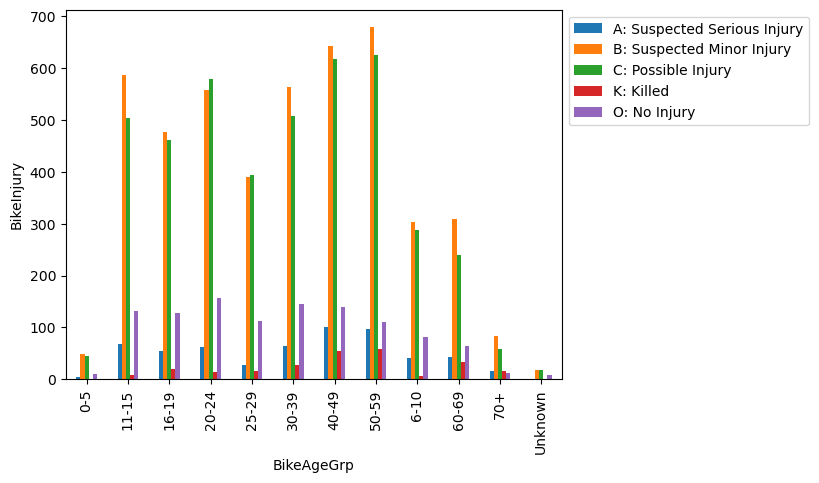

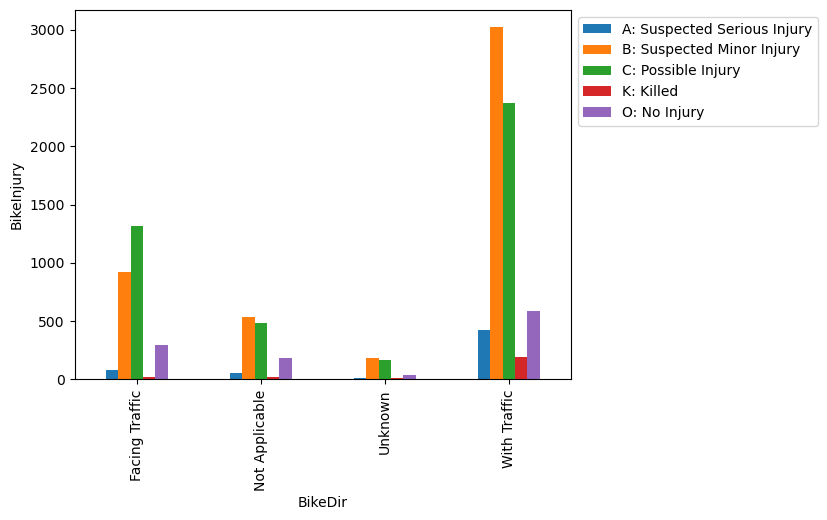

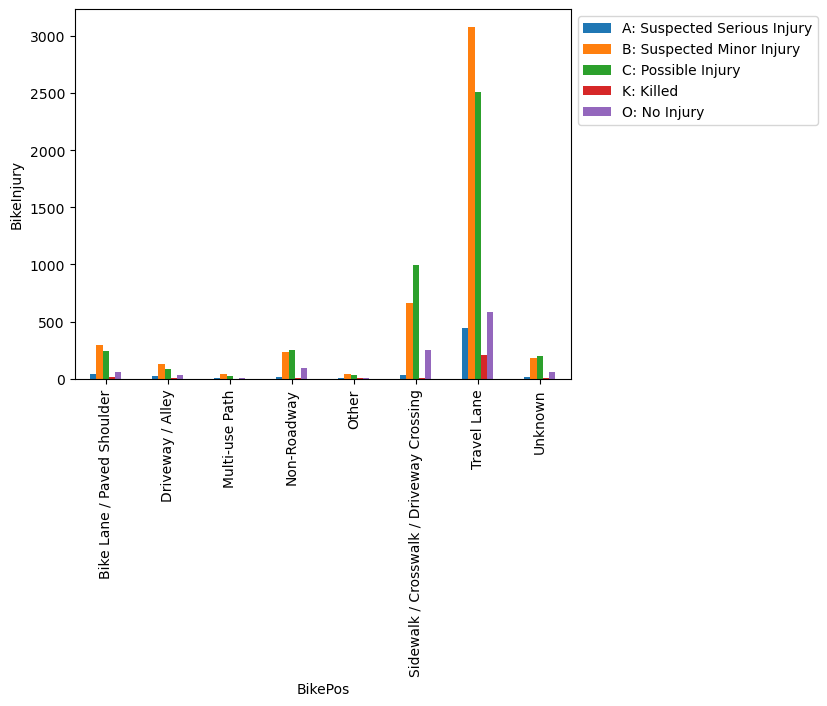

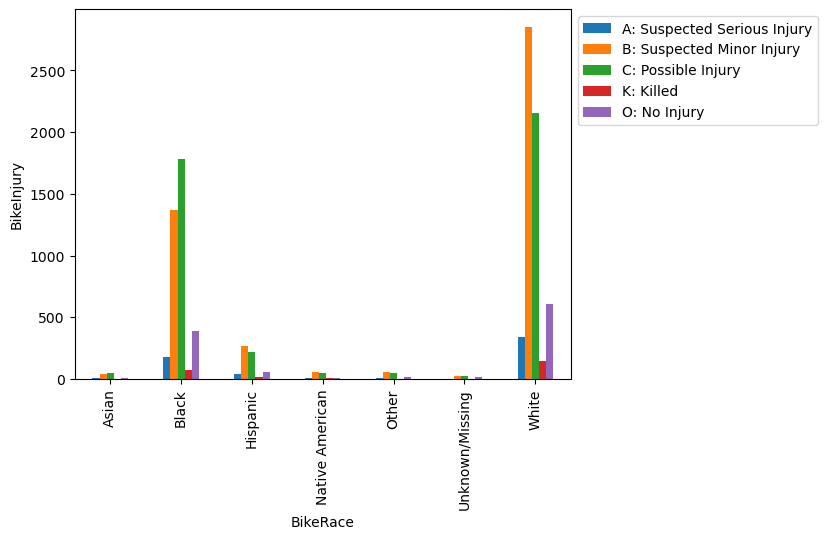

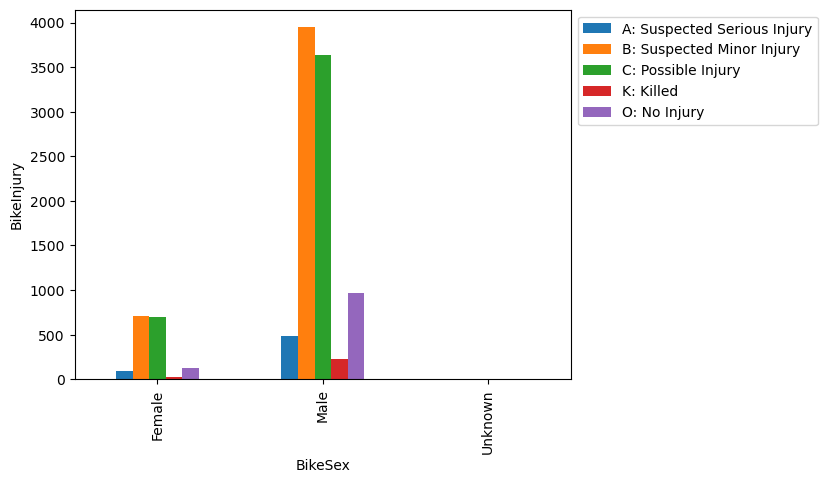

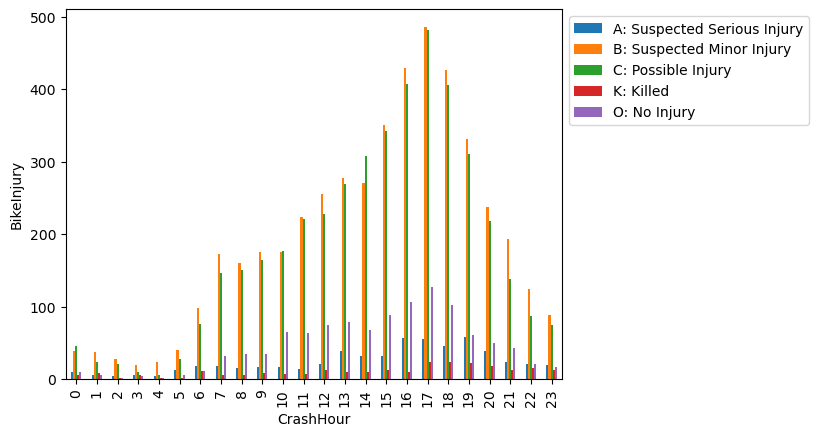

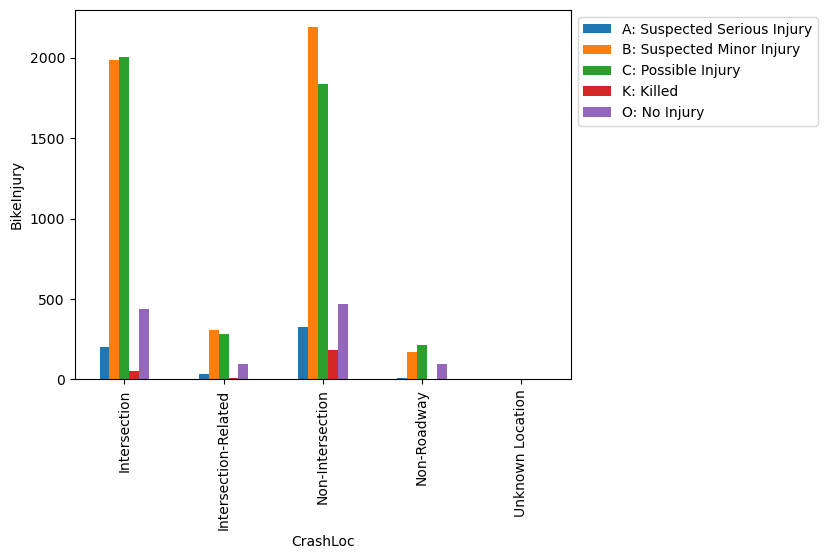

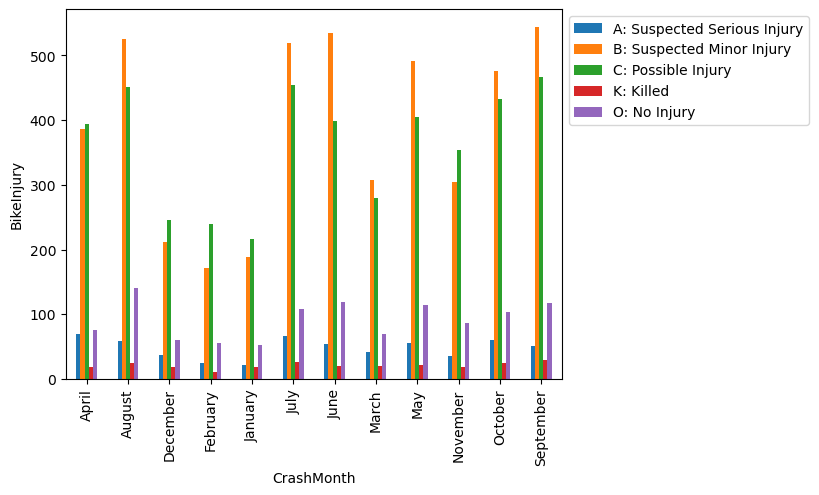

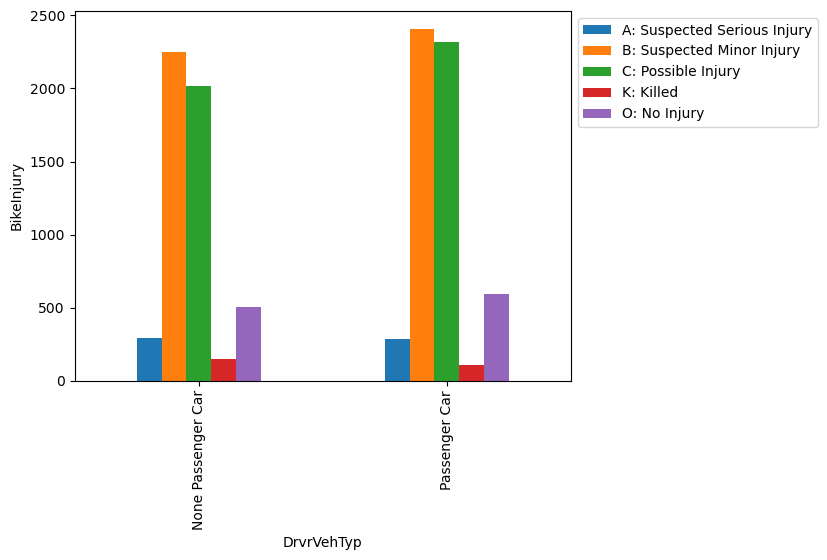

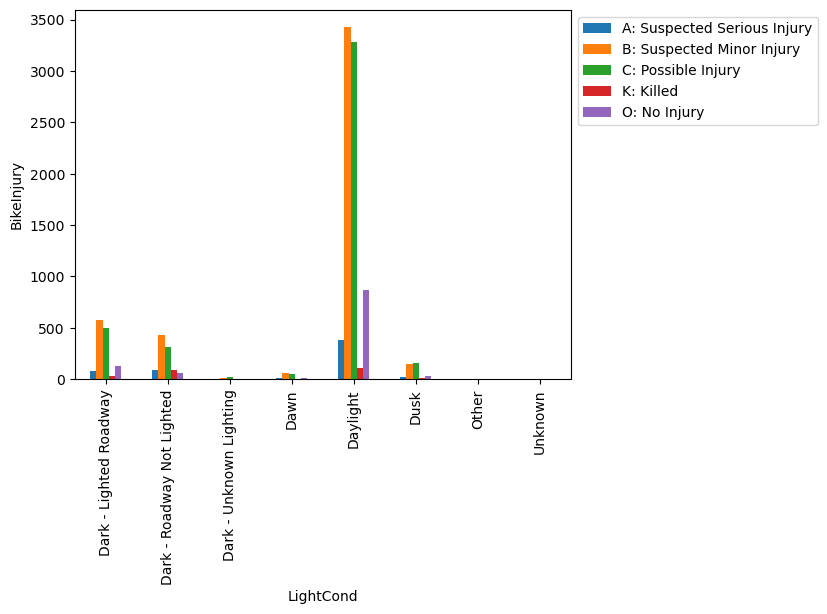

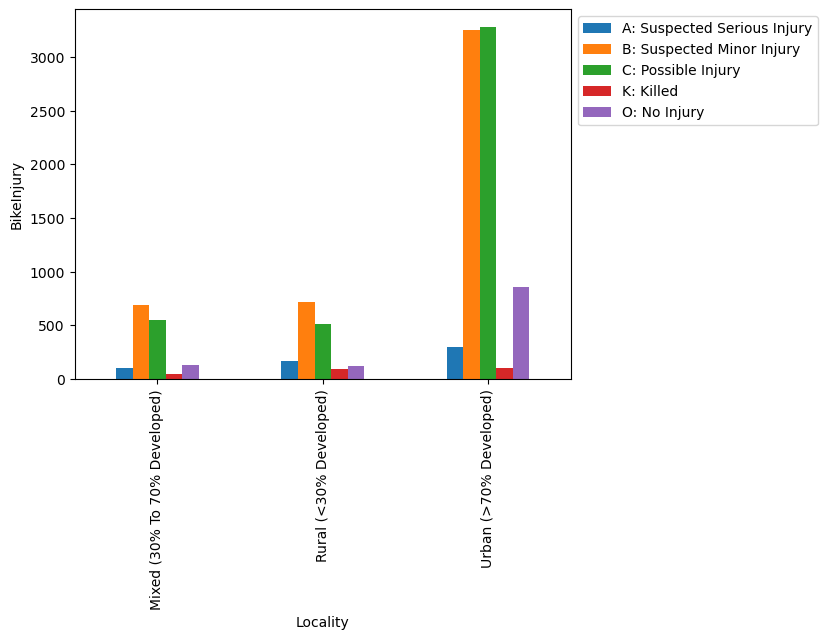

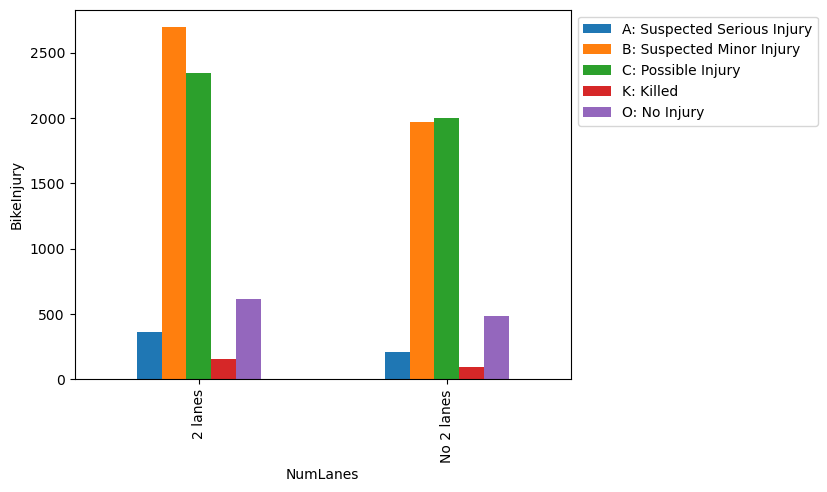

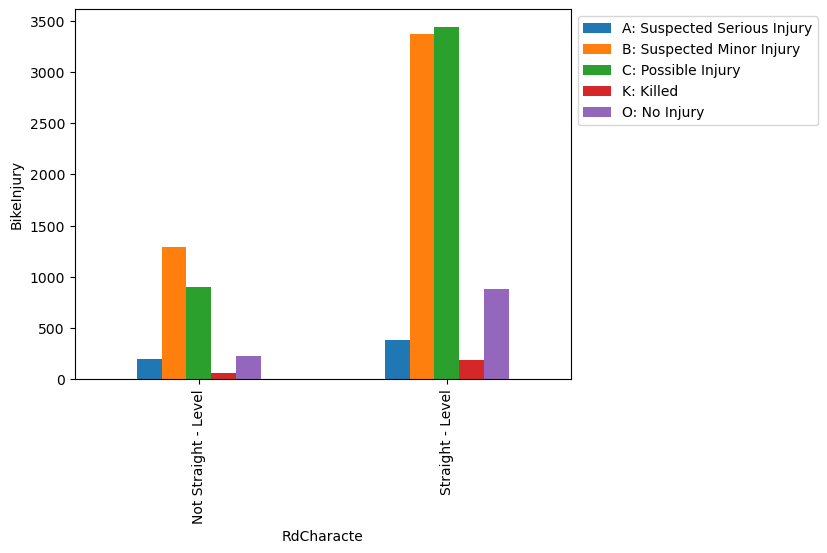

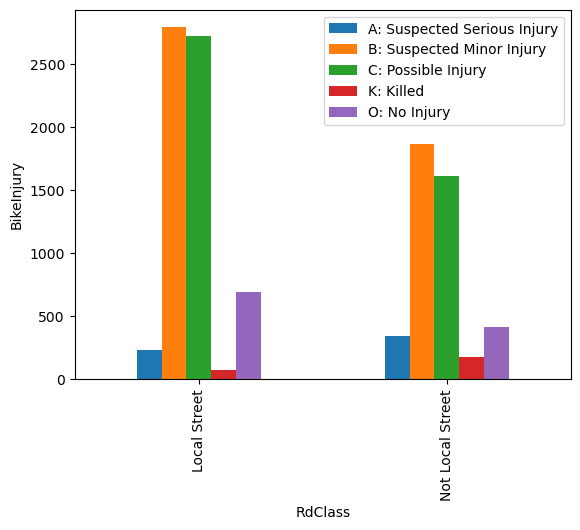

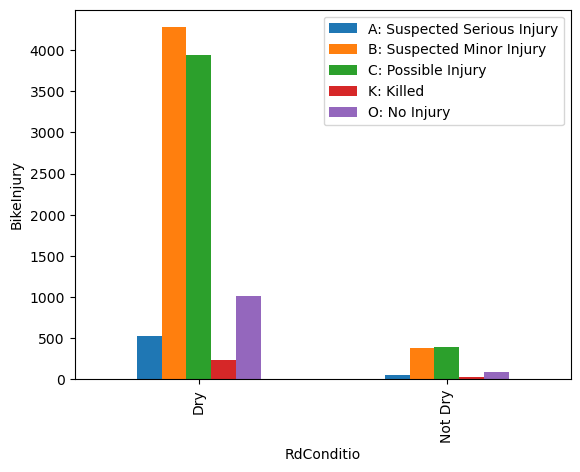

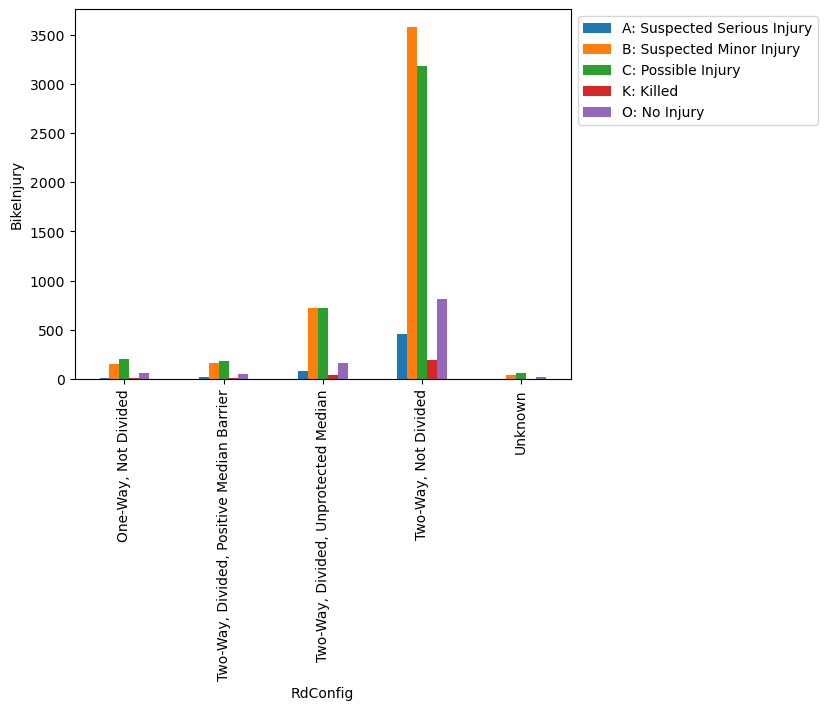

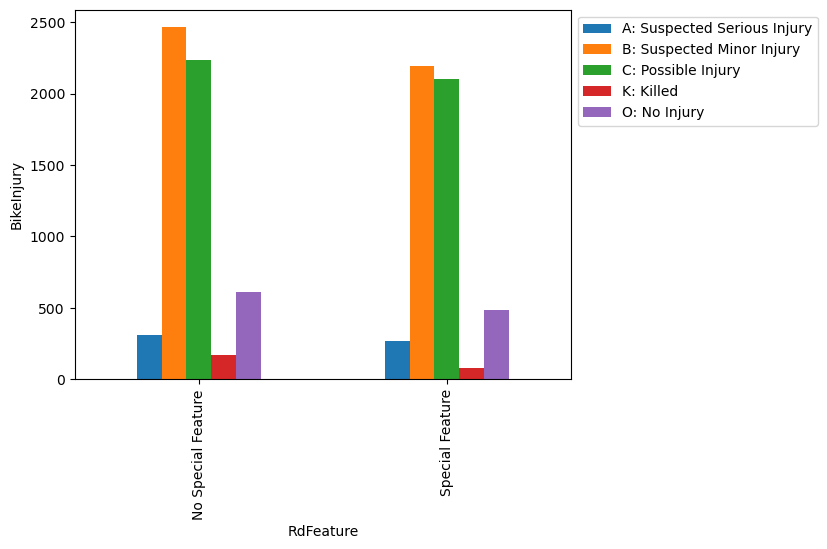

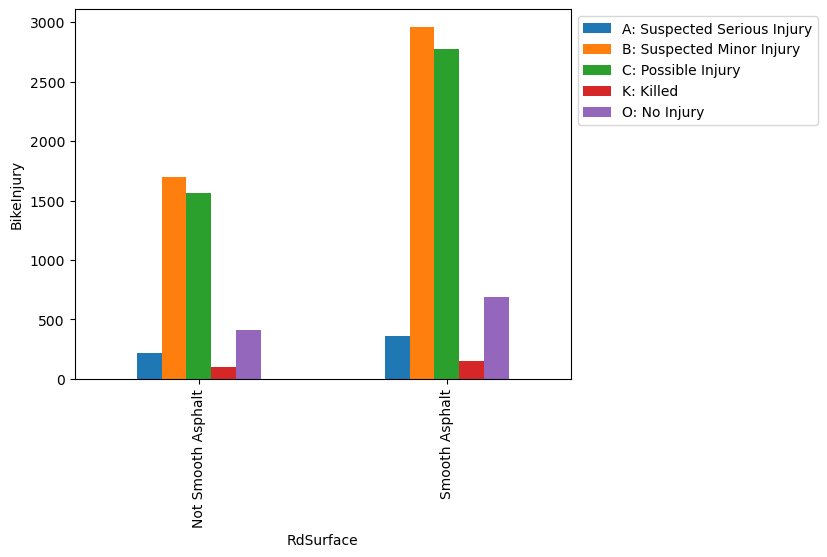

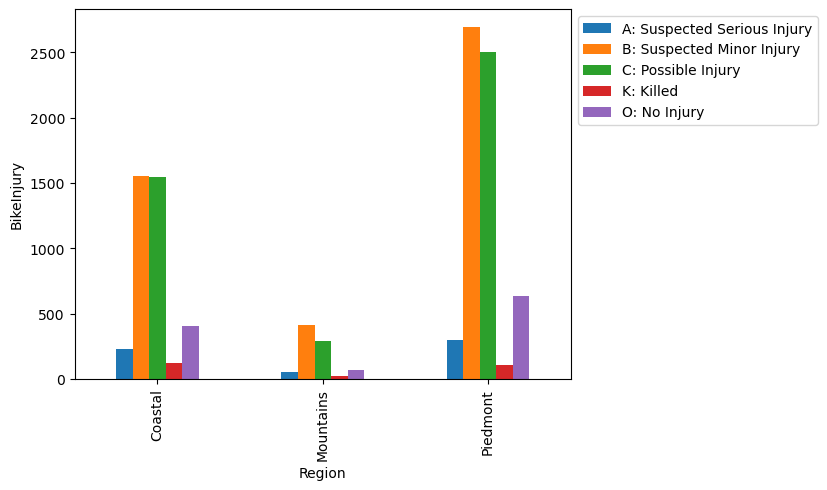

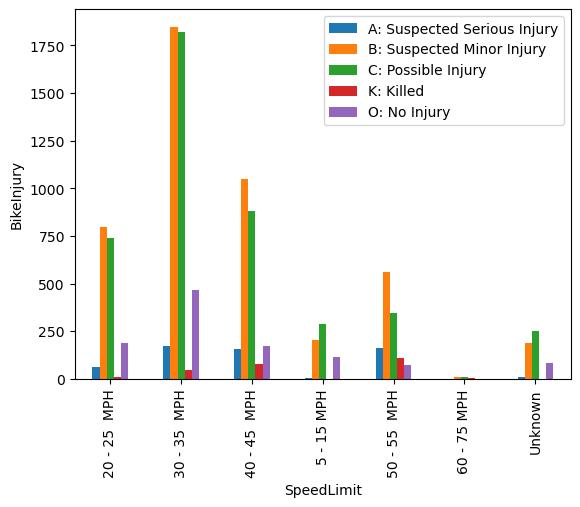

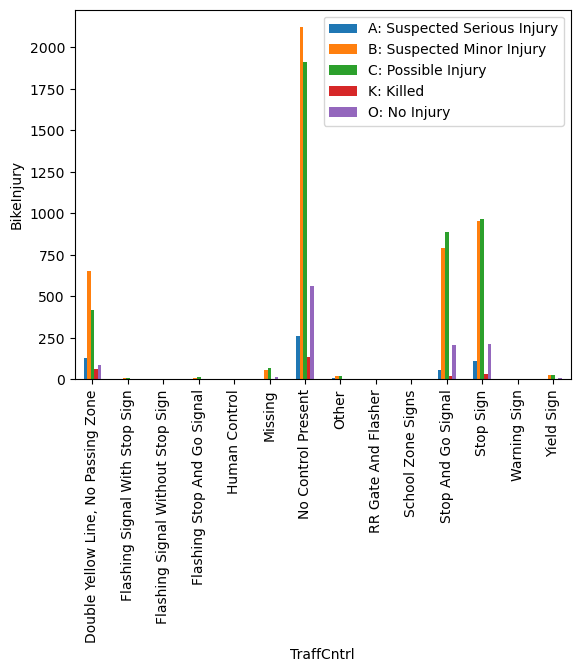

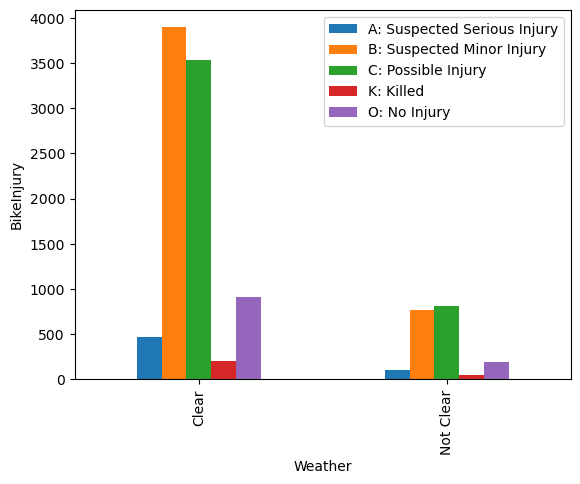

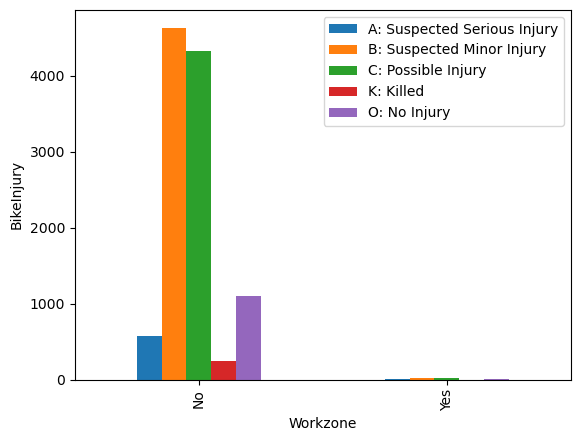

In [24]:
## Bar graphs comparing Biker Injury to all other freatures 

column_names = bicycle.columns.drop(['BikeInjury','BikeInjury_Encoded', 'LightCond_Encoded', 'Weather_Encoded'])

for col in column_names:
    pd.crosstab(bicycle[col], bicycle['BikeInjury']).plot(kind='bar', stacked=False)
    plt.xlabel(col)
    plt.ylabel('BikeInjury')
    plt.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [25]:
X = pd.get_dummies(bicycle['CrashLoc'], dtype=int)
y = bicycle['BikeInjury']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.4071363220494053

In [27]:
i=0
for cat in log_reg.classes_:
    print(f"The mean of predicted probablities of {cat} is", log_reg.predict_proba(X)[:,i].mean())
    i += 1

The mean of predicted probablities of A: Suspected Serious Injury is 0.05162429657677339
The mean of predicted probablities of B: Suspected Minor Injury is 0.4304078610027485
The mean of predicted probablities of C: Possible Injury is 0.39475392355784505
The mean of predicted probablities of K: Killed is 0.02317400051034649
The mean of predicted probablities of O: No Injury is 0.1000399183522867
